In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
#https://www.google.com/covid19/mobility/

df20 = pd.read_csv("2020_TR_Region_Mobility_Report.csv")
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

In [3]:
df21 = pd.read_csv("2021_TR_Region_Mobility_Report.csv")
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158430 entries, 0 to 158429
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 158430 non-null  object 
 1   country_region                                      158430 non-null  object 
 2   sub_region_1                                        158152 non-null  object 
 3   sub_region_2                                        135654 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     22498 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            158430 non-null  object 
 8   date                                                158430 non-n

In [4]:
#normalize column names to clean up coding in df20
df20 = df20.rename(columns={ 'country_region_code': 'region_code',
                        'country region': 'country_region',
                        'sub_region_1': 'region_1', 'sub_region_2': 'region_2',
                        'metro_area': 'metro', 'iso_3166_2_code':'iso',
                        'cencus_fips_code':'cencus', 'place_id':'place_id',
                        'date':'date','retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
                        'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                        'parks_percent_change_from_baseline':'parks', 'transit_stations_percent_change_from_baseline': 'transit_stations',
                        'workplaces_percent_change_from_baseline':'workplaces','residential_percent_change_from_baseline':'residential'})


In [5]:
#normalize column names to clean up coding in df21
df21 = df21.rename(columns={ 'country_region_code': 'region_code',
                        'country region': 'country_region',
                        'sub_region_1': 'region_1', 'sub_region_2': 'region_2',
                        'metro_area': 'metro', 'iso_3166_2_code':'iso',
                        'cencus_fips_code':'cencus', 'place_id':'place_id',
                        'date':'date','retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
                        'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                        'parks_percent_change_from_baseline':'parks', 'transit_stations_percent_change_from_baseline': 'transit_stations',
                        'workplaces_percent_change_from_baseline':'workplaces','residential_percent_change_from_baseline':'residential'})

In [6]:

# 1. soru
df20.dropna(how='all', axis=1) # Null olan sütunlar çıkarıldı

,region_code,country_region,region_1,region_2,iso,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0
1,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,6.0,14.0,2.0,5.0,0.0
2,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,5.0,10.0,5.0,8.0,-2.0
3,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-18,4.0,6.0,11.0,4.0,8.0,-2.0
4,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-19,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167652,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-27,-93.0,NaN,NaN,NaN,-59.0,21.0
167653,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-28,-43.0,35.0,NaN,-33.0,-30.0,11.0
167654,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-29,-46.0,36.0,NaN,-34.0,-29.0,12.0
167655,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-30,-48.0,17.0,NaN,-27.0,-26.0,11.0


In [7]:
df21.dropna(how='all', axis=1) # Null olan sütunlar çıkarıldı (2021 datası)

,region_code,country_region,region_1,region_2,iso,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-01,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-02,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-03,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-04,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-05,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158425,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-01,-12.0,101.0,NaN,-17.0,-15.0,3.0
158426,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-02,-14.0,65.0,NaN,-9.0,-17.0,1.0
158427,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-03,-20.0,NaN,NaN,-19.0,-24.0,2.0
158428,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-04,-8.0,111.0,NaN,-4.0,-15.0,1.0


In [8]:
df20 = df20.iloc[:,:].fillna(0) # NaN değerleri 0 olarak değiştirildi

In [9]:
df21 = df21.iloc[:,:].fillna(0) # NaN değerleri 0 olarak değiştirildi(2021 datası)

In [10]:
 # 2020 datası aylara göre gruplandırma yapıldı ve 9 14 sütunları arasında indirgendi.
df20.index = pd.DatetimeIndex(df20['date']).month
df20.groupby(df20.date).mean()
data1 = df20.iloc[:,9:15]
data1

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2,2.0,3.0,-11.0,-4.0,7.0,1.0
2,7.0,6.0,14.0,2.0,5.0,0.0
2,6.0,5.0,10.0,5.0,8.0,-2.0
2,4.0,6.0,11.0,4.0,8.0,-2.0
2,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...
12,-93.0,0.0,0.0,0.0,-59.0,21.0
12,-43.0,35.0,0.0,-33.0,-30.0,11.0
12,-46.0,36.0,0.0,-34.0,-29.0,12.0


In [11]:
# 2021 datası aylara göre gruplandırma yapıldı ve 9 14 sütunları arasında indirgendi.
df21.index = pd.DatetimeIndex(df21['date']).month
df21.groupby(df21.date).mean()
data2 = df21.iloc[:,9:15]
data2

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
1,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
1,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
1,-33.0,18.0,4.0,-17.0,-20.0,7.0
1,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...
10,-12.0,101.0,0.0,-17.0,-15.0,3.0
10,-14.0,65.0,0.0,-9.0,-17.0,1.0
10,-20.0,0.0,0.0,-19.0,-24.0,2.0


In [28]:
# 2. soru
# 2020 datası için Mahalanobis Distance hesabı 
def mahalanobis(df):    
    inv_cov = np.linalg.inv(df.cov())
    mahalanobis_distance = []
    
    for index,row in df.iterrows():
        mahalo_dist = distance.mahalanobis(row, df.mean(), inv_cov)
        mahalanobis_distance.append(mahalo_dist)

    return pd.DataFrame(mahalanobis_distance, df.index) # month lara göre indexlemek için df.index

df_x = data1[['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']]

df_x["mahalanobis"] = mahalanobis(df=data1)

#df_y["mahalanobis"] = mahalanobis_dist(df=data2)

idx = df_x["mahalanobis"].idxmax()

#idx2 = grouped21["mahalanobis_dist"].idxmax()

print( "df_x['mahalanobis']["+str(idx)+"] = " + str(df_x["mahalanobis"][idx]) + " is outlier" )
#print( "grouped21['mahalanobis_dist']["+str(idx2)+"] = " + str(grouped21["mahalanobis_dist"][idx2]) + " is outlier" )



df_x['mahalanobis'][8] = date
8    3.428391
8    3.780580
8    4.525868
8    2.243454
8    1.979569
       ...   
8    1.113672
8    1.077098
8    1.216533
8    1.137756
8    1.169290
Name: mahalanobis, Length: 13574, dtype: float64 is outlier


In [34]:
# 2021 datası için Mahalanobis Distance hesabı
def mahalanobis(df):
    inv_cov = np.linalg.inv(df.cov())
    mahalanobis_distance2 = []
    
    for index,row in df.iterrows():
        mahalo_dist2 = distance.mahalanobis(row, df.mean(), inv_cov)
        mahalanobis_distance2.append(mahalo_dist2)

    return pd.DataFrame(mahalanobis_distance2, df.index) # month lara göre indexlemek için df.index

df_y = data2[['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']]

df_y["mahalanobis"] = mahalanobis(df=data2)

idx2 = df_y["mahalanobis"].idxmax()

#print( "df_x['mahalanobis']["+str(idx)+"] = " + str(df_x["mahalanobis"][idx]) + " is outlier" )
print( "df_y['mahalanobis']["+str(idx2)+"] = " + str(df_y["mahalanobis"][idx2]) + " is outlier" )

df_y['mahalanobis'][7] = date
7    1.761386
7    1.524953
7    1.492019
7    2.335627
7    1.699230
       ...   
7    3.979387
7    2.657946
7    3.954031
7    3.023133
7    2.787400
Name: mahalanobis, Length: 17483, dtype: float64 is outlier


In [13]:
# 3. soru
# 
from scipy.spatial.distance import cosine

dflist1 = [0]*14
meanlist1 = [0]*14
meanlist2 = [0]*14

for i in range(2,13):
    dflist1[i] = data1.loc[i] # 2020 datası aylara bölündü

for i in range(2,13): # 2020 datası için
    meanlist1[i] = dflist1[i].mean() # Aynı aylardaki değerlerin ortalamaları meanlist1 dizisine atıldı
    
dflist2 = [0]*14

for i in range(1,13):
    if i == 2 or i == 11 or i== 12:
        continue
    else:
        dflist2[i] = data2.loc[i] # 2021 datası aylara bölündü
        
for i in range(1,13): # 2021 datası için
    if i == 2 or i == 11 or i== 12:
        continue
    else:
        meanlist2[i] = dflist2[i].mean()  # Aynı aylardaki değerlerin ortalamaları meanlist2 dizisine atıldı


# 1. Yöntem : Cosine Distance (Her ay için uzaklık hesabı)

# 2020 ve 2021 datalarında aynı aylardaki ortalama değerlerin cosine distance hesabı yapıldı
cosine_list = dict()
for i in range(len(meanlist1)-1):
    if i == 0 or i==1 or i==2 or i==11 or i==12: # ortak olmayan aylar hesaba katılmadı
        continue
    else:
        cos = cosine(meanlist1[i],meanlist2[i]) # Cosine Distance hesabı
        cosine_list[i] = cos


cosine_list


{3: 0.24798491335188655,
 4: 0.17780567009082116,
 5: 0.08367350248205807,
 6: 0.3272520690366495,
 7: 0.19070029515721554,
 8: 0.3222084164656437,
 9: 0.5558348022876531,
 10: 0.43864449487396207}

In [14]:
# 2. Yöntem : Manhattan Distance (Her ay için uzaklık hesabı)
# 2020 ve 2021 datalarında aynı aylardaki ortalama değerlerin manhattan distance hesabı yapıldı
from scipy.spatial.distance import cityblock

city_dist = dict()

for i in range(len(meanlist1)-1):
    if i == 0 or i==1 or i==2 or i==11 or i==12: # ortak olmayan aylar hesaba katılmadı
        continue
    else:
        city_block = cityblock(meanlist1[i],meanlist2[i]) # Manhattan distance hesabı
        city_dist[i] = city_block

city_dist        



{3: 24.250454307483512,
 4: 118.45358258013954,
 5: 67.28369752767287,
 6: 50.599177395588015,
 7: 86.0370658092351,
 8: 86.3778488388015,
 9: 92.59484123666566,
 10: 80.97175170352473}

In [15]:
# 3. Yöntem : Jaccard (Her ay için uzaklık hesabı)
# 2020 ve 2021 datalarında aynı aylardaki ortalama değerlerin jaccard distance hesabı yapıldı

from scipy.spatial.distance import jaccard

j = dict()

for i in range(len(meanlist1)-1):
    if i == 0 or i==1 or i==2 or i==11 or i==12: # ortak olmayan aylar hesaba katılmadı
        continue
    else:
        jac = jaccard(meanlist1[i],meanlist2[i]) #Jaccard distance hesabı
        j[i] = jac

j        

{3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0}

In [16]:
# 4. soru

# Sample size'ı 50 ile 1000 arasında olacak şekilde frekans ayarlandı ve samplelar oluşturuldu.
# sample1 = data1.sample(frac=0.00035, replace=True, random_state=1)
# sample2 = data1.sample(frac=0.0058, replace=True, random_state=1)
# sample3 = data1.sample(frac=0.0018, replace=True, random_state=1)
# sample4 = data1.sample(frac=0.005, replace=True, random_state=1)
# sample5 = data1.sample(frac=0.0004, replace=True, random_state=1)

sample1 = data1.sample(n=50, replace=True, random_state=1)
sample2 = data1.sample(n=100, replace=True, random_state=1)
sample3 = data1.sample(n=150, replace=True, random_state=1)
sample4 = data1.sample(n=200, replace=True, random_state=1)
sample5 = data1.sample(n=250, replace=True, random_state=1)

sample_sizes = []

# Sample size'lar listede tutuldu
sample_sizes.append(sample1.shape[0])
sample_sizes.append(sample2.shape[0])
sample_sizes.append(sample3.shape[0])
sample_sizes.append(sample4.shape[0])
sample_sizes.append(sample5.shape[0])

# Sample'ların ortalamaları alındı
mean1 = sample1.mean()
mean2 = sample2.mean()
mean3 = sample3.mean()
mean4 = sample4.mean()
mean5 = sample5.mean()

# Ortalama değerleri dataframede tutuldu
d = [mean1,mean2,mean3,mean4,mean5]
df = pd.DataFrame(data=d)
sample_sizes

[50, 100, 150, 200, 250]

In [17]:
# Tüm datanın ortalama değerleri alındı
means = data1.mean()
hatalar = []

for element in d:     
    hata = abs(means - element) # Sample meanlar tüm datadaki meanlerden çıkarıldı,mutlak değeri alındı ve hata hesabı yapıldı
    hata = hata.mean() 
    hatalar.append(hata)
hatalar


[2.6216073888951854,
 1.7522427237355636,
 1.1535543069746235,
 1.6538320847524017,
 1.324640577687382]

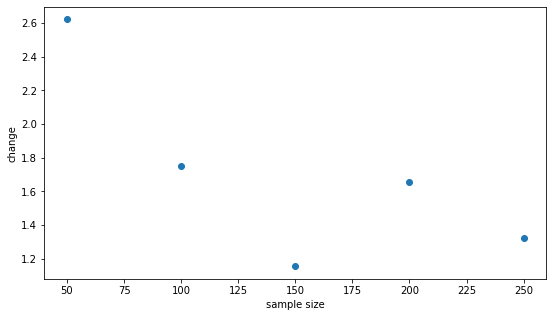

In [18]:
import matplotlib.pyplot as plt
# X ekseninde sample size y ekseninde hata değerleri olacak şekilde grafik çizdirildi
fig, ax = plt.subplots(figsize=(9, 5))

ax.scatter(x=sample_sizes,y=hatalar)
ax.set_xlabel("sample size")
ax.set_ylabel("change")
plt.show()

In [19]:
# 5. soru

dflist = [0]*14
sample_list = [0]*14
for i in range(2,13):
    dflist[i] = data1.loc[i] #  Aynı aylardaki değerler dflist  dizisine atıldı
    
for i in range(2,13):   # Her aydan 50 büyüklüğünde samplelar oluşturuldu ve ortalamsı alındı 
    sample = dflist[i].sample(n=50, replace=True, random_state=1)
    sample_list[i] = sample.mean()
    
sample_list

[0,
 0,
 retail_and_recreation    2.34
 grocery_and_pharmacy     1.52
 parks                    4.18
 transit_stations        -2.18
 workplaces               9.06
 residential             -0.40
 dtype: float64,
 retail_and_recreation   -24.38
 grocery_and_pharmacy     -6.82
 parks                   -10.92
 transit_stations        -18.42
 workplaces              -18.92
 residential               6.06
 dtype: float64,
 retail_and_recreation   -36.92
 grocery_and_pharmacy    -18.16
 parks                   -27.40
 transit_stations        -42.36
 workplaces              -43.92
 residential               9.78
 dtype: float64,
 retail_and_recreation   -44.40
 grocery_and_pharmacy    -10.92
 parks                   -21.26
 transit_stations        -36.34
 workplaces              -36.88
 residential               8.12
 dtype: float64,
 retail_and_recreation   -13.24
 grocery_and_pharmacy      7.76
 parks                    12.66
 transit_stations        -11.24
 workplaces              -11.08
 r

In [20]:
mean_list = [0]*14

for i in range(2,13): # Ayların ortalamaları mean_list dizisine atıldı
    mean = sample_list[i].mean()
    mean_list[i] = mean

mean_list    
# 0 olan değerler çıkarıldı
mean_list.remove(0)
mean_list.remove(0)
mean_list.remove(0)

mean_list    

[2.42,
 -12.233333333333334,
 -26.496666666666666,
 -23.613333333333333,
 -2.146666666666667,
 4.35,
 0.16333333333333352,
 -0.27666666666666645,
 2.5066666666666664,
 -6.823333333333333,
 -14.783333333333331]

In [21]:
means = data1.mean() # Tüm datanın mean değerleri meanste tutuldu
sample_hatalar = [] # hatalar dizisi

for element in mean_list:
    # Tüm datadaki verilerin ortalamasından aylara göre oluşturulan sampleların ortalamasının farkı alınıp hata hesabı yapıldı
    hata = abs(means - element)
    hata = hata.mean()
    sample_hatalar.append(hata)
    
sample_hatalar

[9.665553163104832,
 9.42861119229538,
 20.102757276264438,
 17.219423942931105,
 9.428611192295381,
 10.743909390402228,
 9.428611192295381,
 9.42861119229538,
 9.69444205199372,
 9.42861119229538,
 9.955508998862094]

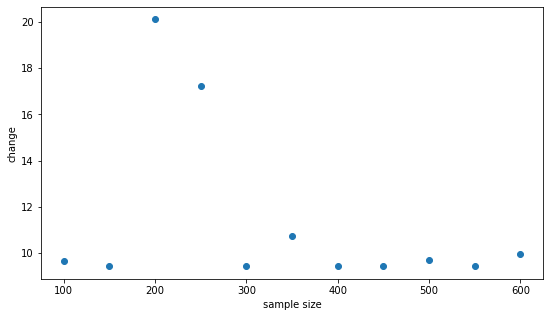

In [22]:
 # x'te sample_size ve y'de sample hata değerleri ile grafik çizdirildi
  
fig, ax = plt.subplots(figsize=(9, 5))
sample_size = [100,150,200,250,300,350,400,450,500,550,600]
ax.scatter(x=sample_size,y=sample_hatalar)
ax.set_xlabel("sample size")
ax.set_ylabel("change")
plt.show()